In [10]:
import pandas as pd
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train = process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [12]:
def df_process(df) :
    columns = ["Age_categories", "Fare_categories", "Title", "Cabin_type", "Sex"]
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    for column_name in columns :
        df = create_dummies(df,column_name)
    return df
train = df_process(train)
holdout = df_process(holdout)

### Exploring columns "SibSp" and "Parch"
Inspection of types, distribution, survival rate for different values

In [14]:
train.SibSp.dtypes

dtype('int64')

In [15]:

train.Parch.dtypes

dtype('int64')

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

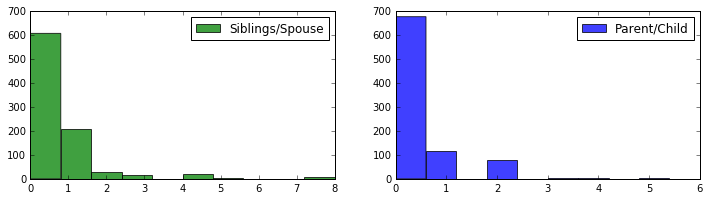

In [37]:
#Visualisation de la distribution des colonnes 'SibSp' et 'Parch'
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(train.SibSp, label = 'Siblings/Spouse', alpha = .75, color = 'Green')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(1,2,2)
ax2.hist(train.Parch, label = 'Parent/Child', alpha = .75)
ax2.legend(loc='upper right')

plt.show()

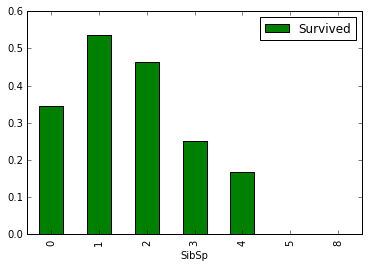

In [39]:
#On désire visualiser de la répartition des survivants selon le nombre de frères/soeurs/époux (colonne SibSp) ou parents/enfants (colonne Parch)
#pour cela, on transforme les colonnes ciblées en tableau croisé dynamique puis on observe le graphe
sex_pivot = train.pivot_table(index="SibSp",values="Survived")
sex_pivot.plot.bar(color = 'Green')
plt.show()

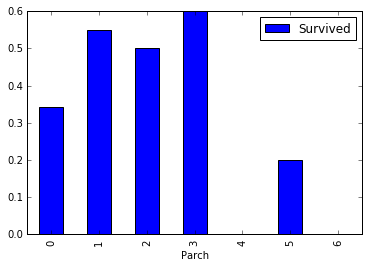

In [19]:
#on fait pareil pour la colonne 'Parch'
pclass_pivot = train.pivot_table(index="Parch",values="Survived")
pclass_pivot.plot.bar()
plt.show()

In [40]:
##Combinaison des 2 colonnes par addition puis visualisation de la distribution résultante
train['family'] = train['SibSp']+train['Parch']

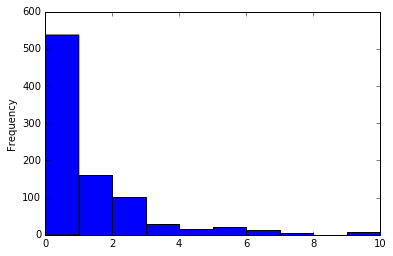

In [42]:
#Visualisation de la distribution de la colonne 'family'
train.family.plot.hist()
plt.show()

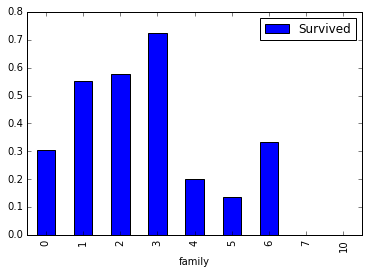

In [43]:
#Visualisation de la répartition des survivants en fonction de la colonne 'family'
sex_pivot = train.pivot_table(index="family",values="Survived")
sex_pivot.plot.bar()
plt.show()

### Observations
Il apparait que la grande majorité des voyageurs étaient très peu accompagnés (en moyenne 1 membre de famille). En revanche, la population des survivants est plus élevée parmi ceux qui ont déclaré plusieurs parent/enfants/frères/soeurs. Impossible cependant d'avoir des précisions selon qu'il s'agit des parents, enfants, frères ou soeurs.
On combinant les colonnes SibSp et Parch, on constate que 30% des survivants sont ceux qui ont 0 membres de famille, les 70% autres ont déclarés au moins 1 membre (avec 3 membres de famille étant ceux qui ont le plus survécu).
On va donc créer une nouvelle feature : 1 si aucun membre de famille, 0 sinon

In [54]:
def has_family(df) :
    
    buff = ((df['SibSp']+df['Parch'])==0)
    df['isalone'] = list(map(int, buff))
                                        
    return df
train = has_family(train)
holdout = has_family(holdout)

In [56]:
#vérifier que le type de la nouvelle colonne est bien numérique
train.isalone.dtypes

dtype('int64')

### Feature preparation, selection and engineering

In [102]:
#Drop colonne "family" dans train avant de continuer le feature engineering
train.drop("family", axis="columns", inplace=True)

In [103]:
#Vérification des proportions avant et après préparation des features
print("Initial number of records : {}".format(train.shape))
print("Number of records after droping columns with missing data : {}"
      .format(train.dropna(axis=1).shape))

Initial number of records : (891, 44)
Number of records after droping columns with missing data : (891, 44)


In [104]:
#liste de toutes les colonnes
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_categories',
       'Fare_categories', 'Title', 'Cabin_type', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12',
       'Fare_categories_12-50', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_type_A',
       'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
       'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown',
       'Sex_female', 'Sex_male', 'isalone'],
      dtype='object')

In [105]:
#liste des colonnes non numériques
cols = train.describe().columns.tolist()
len(cols)

36

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    #drop columns containing non-numeric columns
    cols = df.describe().columns.tolist()
    df = df[cols]
    #drop columns containing null values
    df = df.dropna(axis=1)
    all_X = df[cols[2:]]
    all_y = df["Survived"]
    rcf = RandomForestClassifier(random_state=1)
    selector = RFECV(rcf,cv=10)
    selector.fit(all_X,all_y)
    best_features = all_X.columns[selector.support_].tolist()
    print(best_features)
    return best_features

best_features = select_features(train)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Young Adult', 'Fare_categories_12-50', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [107]:
len(best_features)

18

### Model selection

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, cols):
    all_X = df[cols]
    all_y = df['Survived']
    liste = [{"name" : "LogisticRegression", "estimator" : LogisticRegression(), 
              "hyperparameters" : {"solver": ["newton-cg", "lbfgs", "liblinear"]} },
             {"name" : "KNeighborsClassifier", "estimator" : KNeighborsClassifier(), 
              "hyperparameters" : {
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
              } },
              {"name" : "RandomForestClassifier", "estimator" : RandomForestClassifier(random_state=1), 
              "hyperparameters" : {
            "n_estimators": [4,6,9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2,5,10],
            "max_features": ["log2", "sqrt"],
                  "min_samples_leaf": [1, 5, 8],
                  "min_samples_split": [2, 3, 5]
              } }]
    for dictio in liste :
        print(dictio["name"])
        estim = dictio["estimator"]
        hyperparameters = dictio["hyperparameters"]
        grid = GridSearchCV(estim, param_grid = hyperparameters, cv=10)
        grid.fit(all_X, all_y)
        dictio["best_params"] = grid.best_params_
        dictio["best_score"] = grid.best_score_
        dictio["best_estimator"] = grid.best_estimator_
    return liste

model_selection_liste = select_model(train, best_features)
    

LogisticRegression
KNeighborsClassifier
RandomForestClassifier


In [109]:
model_selection_liste

[{'best_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  'best_params': {'solver': 'liblinear'},
  'best_score': 0.8204264870931538,
  'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  'hyperparameters': {'solver': ['newton-cg', 'lbfgs', 'liblinear']},
  'name': 'LogisticRegression'},
 {'best_estimator': KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=1,
             weights='uniform'),
  'best_params': {'algorithm': 'brute',
   'n_neig

In [110]:
#Créer fichier qui sera soumis à Kaggle
def save_submission_file(trained_model, cols, filename="submission.csv"):
    holdout_predictions = trained_model.predict(holdout[cols])
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,"Survived": holdout_predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(path_or_buf=filename, index=False)
    return()

liste = list()
for dictio in model_selection_liste :
    liste.append(dictio["best_score"])
best_performing_score = max(liste)

for dictio in model_selection_liste :
    if dictio["best_score"] == best_performing_score :
        best_performing_model = dictio["best_estimator"]
best_performing_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [111]:
#cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']
save_submission_file(best_performing_model, best_features)

()